# District Exploratory Data Analysis

This notebook contains the inital district analysis. 

* Data overview
* Data distributions
* District Population
* District Housing
* District Enrichment Features
* Patterns and correlations

# Environment & Data

We prepare the enviromnet for eda and load the created district master table.

In [1]:
# Bootstrap
import sys, os
import pandas as pd
import numpy as np

# Add repo root to path so imports work
sys.path.append(os.path.abspath(os.path.join("..", "..")))

from berlin_housing import config

# Vizualization settings
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set_palette("colorblind")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
bezirk_master = pd.read_csv(config.BEZIRK_MASTER_OUT)

# Data Overview

In [3]:
bezirk_master.head(12)

,bezirk,district_total_bridges,district_bridges_city_streets,district_bridges_green_spaces,district_movie_theaters,district_total_cars,district_private_cars,district_private_cars_per_100_inhabitants,district_tourism_guests_2024,district_tourism_overnightstays_2024,district_tourism_overnightstays_change_2023_2024,district_street_trees,district_libraries,district_libraries_visits,district_libraries_borrowings,district_central_heating_percentage,district_heating,district_heating_percentage,district_floor_heating_percentage,district_block_heating_percentage,district_stove_heating_percentage,district_no_heating_percentage,district_gas_energy_percentage,district_oil_energy_percentage,district_mixed_energy_sources_percentage,district_solar_energy_percentage,district_wood_pellets_energy_percentage,district_biomass_energy_percentage,district_electric_energy_percentage,district_coal_energy_percentage,district_no_energy_source_percentage,district_housing_built_before_1950_percentage,1950-1969_percentage,1970-1989_percentage,1990-2009_percentage,district_housing_built_after_2010_percentage,district_total_apartments,district_occupied_by_owner_percentage,district_residential_rental_percentage,district_vacation_leisure_rental_percentage,district_empty_apartments,district_empty_apartments_percentage,district_average_living_space_m2,district_employed,district_employed_percentage,district_unemployed,district_unemployed_percentage,district_not_working,district_not_working_percentage,district_labor_force,district_male_labor_force,district_female_labor_force,district_total_households,district_single_households,district_couples_without_children,district_couples_without_children_percentage,district_couples_with_children,district_couples_with_children_percentage,district_single_parents,district_shared_apartments,district_only_seniors_households,district_apartment_owners,district_apartment_owner_percentage,district_apartment_tenants,district_apartment_tenant_percentage,2_person_EUR_per_squared_meter,district_apartment_average_rooms,2_person_average_rooms,district_average_persons_per_household,district_average_years_of_residence,district_full_time_employees,district_median_income,district_total_population,district_male_population,district_male_population_percentage,district_female_population,district_female_population_percentage,district_single_population,district_couples_population,district_widowed_population,district_divorced_population,district_other_civil_status_population,district_average_age,district_population_under_18,district_population_under_18_percentage,district_population_18_29,district_population_18_29_percentage,district_population_30_49,district_population_30_49_percentage,district_population_50_64,district_population_50_64_percentage,district_population_65_plus,district_population_65_plus_percentage,district_min_rent_m2,district_avg_rent_m2,district_max_rent_m2,district_min_Buy_m2,district_avg_buy_m2
0,charlottenburg-wilmersdorf,126,54,9,12,135928,96143,28.0,4041767,9554578,47160,42263,7,593574,1419015,45.4,8428.0,43.7,9.5,0.8,0.5,0.1,38.1,16.3,43.7,0.9,0.3,0.0,0.5,0.1,0.1,54.7,26.2,10.8,4.6,3.7,194159.0,16.3,80.9,0.3,4821.0,2.5,77.70,157160.0,51.1,13520.0,4.4,136880.0,44.5,170680.0,85750.0,84930.0,187477.0,120247.0,25457.0,13.6,22500.0,12.0,11882.0,7392.0,49968.0,31398.0,16.7,156006.0,83.2,8.31,3.3,3.8,1.7,13.2,79654,4398,317079.0,150770.0,47.6,166238.0,52.4,162685.0,100977.0,18499.0,33622.0,1230.0,45.0,44463.0,14.0,45878.0,14.5,84811.0,26.8,67044.0,21.1,74816.0,23.6,11.967500,16.982500,28.567500,3635.500000,6172.250000
1,friedrichshain-kreuzberg,40,34,5,11,60196,50147,17.1,3352293,8564603,547842,16520,6,528940,1572879,40.8,4128.0,37.6,18.4,1.9,1.3,0.0,55.8,4.3,37.6,0.3,0.4,0.3,0.8,0.5,0.0,60.8,16.8,10.9,6.4,5.1,157555.0,8.4,89.5,0.1,3181.0,2.0,67.86,151700.0,58.7,12760.0,4.9,94010.0,36.4,164470.0,86880.0,77590.0,153287.0,97888.0,15331.0,10.0,17855.0,11.6,12004.0,10212.0,17732.0,13153.0,8.6,140111.0,91.4,8.18,3.1,3.5,1.7,11.8,73484,45

In [4]:
print("Rows and Columns: ", bezirk_master.shape)
bezirk_master.info()

Rows and Columns:  (12, 98)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 98 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   bezirk                                            12 non-null     object 
 1   district_total_bridges                            12 non-null     int64  
 2   district_bridges_city_streets                     12 non-null     int64  
 3   district_bridges_green_spaces                     12 non-null     int64  
 4   district_movie_theaters                           12 non-null     int64  
 5   district_total_cars                               12 non-null     int64  
 6   district_private_cars                             12 non-null     int64  
 7   district_private_cars_per_100_inhabitants         12 non-null     float64
 8   district_tourism_guests_2024                      12 non-null     int64  


The data has 12 columns, one for each district. There are no null values in the 98 columns.

* **District Identifier** (bezirk — Name of the district `Bezirk`)
* **Infrastructure & Mobility** (bridges, cars)
* **Culture & Tourism** (movie theaters, libraries, tourists, overnight stays, change 2023 to 2024)
* **Environment** (trees)
* **Heating Systems** (% of housing units)
* **Energy Sources** (% of housing units)
* **Housing Stock** (built year, total apartments, owners vs tenants, residentual vs leisure, empty apartments, average living space)
* **Employment & Labor** (employed, unemployed, not working (not part of the labor force), female vs male employees, median income)
* **Households** (total households, average household size, singles, couples (with and without children), single parents, WGs (shared flats), senior households, years of residence)
* **Demographics & Population** (total population, male vs female, singles, couples, widowed, divorced, average age)
* **Age Groups** (-18, 18-29, 30-49, 50-64, 65+)
* **Housing Market** (average rent per m², minimum rent per m², max rent per m², average purchase price per m²)


# Distributions

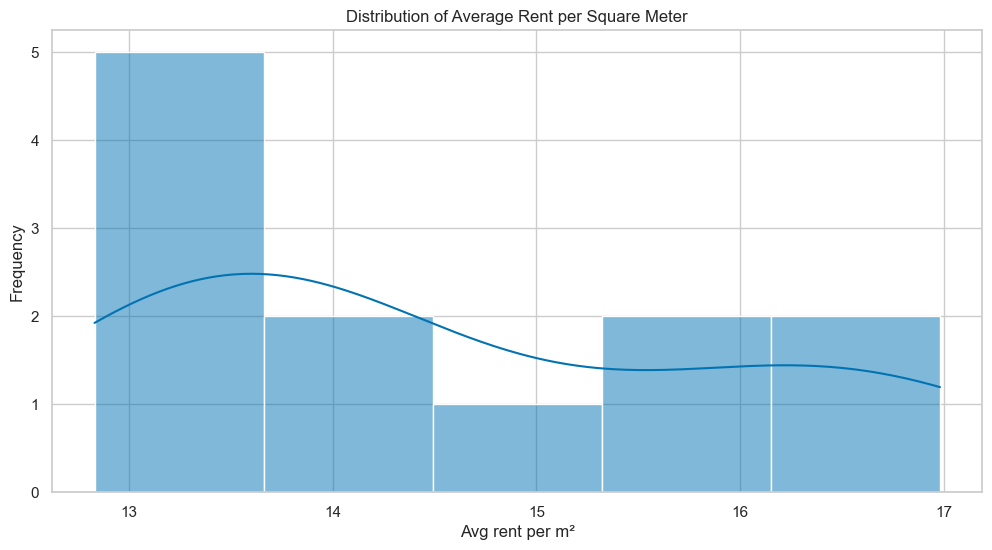

In [5]:
plt.figure(figsize=(12, 6))
sns.histplot(bezirk_master["district_avg_rent_m2"], kde=True)
plt.title("Distribution of Average Rent per Square Meter")
plt.xlabel("Avg rent per m²")
plt.ylabel("Frequency")
plt.show()

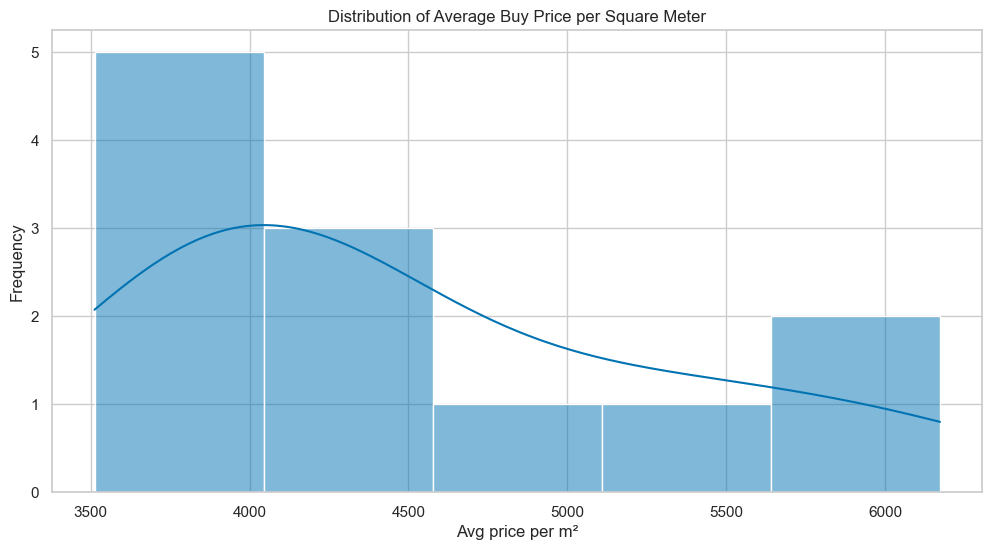

In [6]:
plt.figure(figsize=(12, 6))
sns.histplot(bezirk_master["district_avg_buy_m2"], kde=True)
plt.title("Distribution of Average Buy Price per Square Meter")
plt.xlabel("Avg price per m²")
plt.ylabel("Frequency")
plt.show()

# District Population

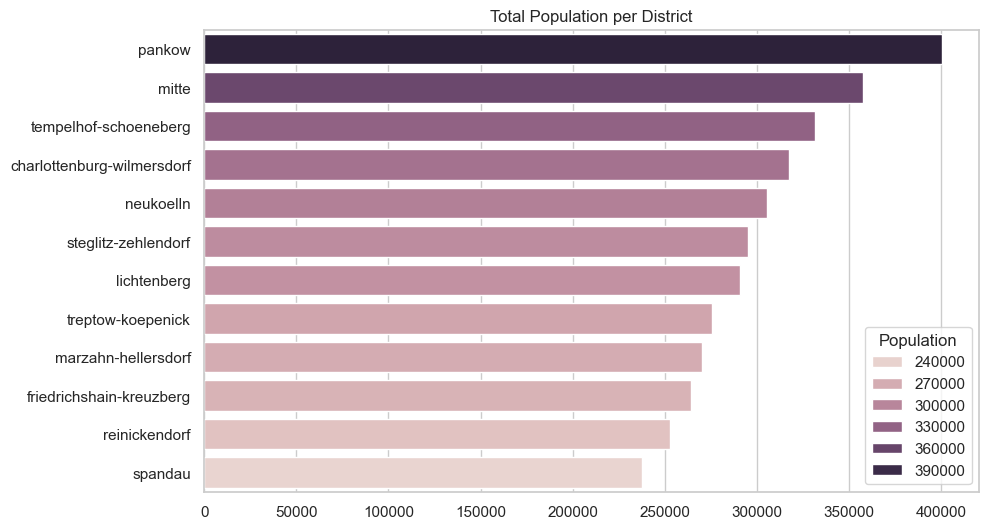

In [17]:
pop_sorted = bezirk_master.sort_values("district_total_population", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="district_total_population", y="bezirk", data=pop_sorted, hue="district_total_population")
plt.title("Total Population per District")
plt.xlabel("")
plt.ylabel("")
plt.legend(title="Population")
plt.show()

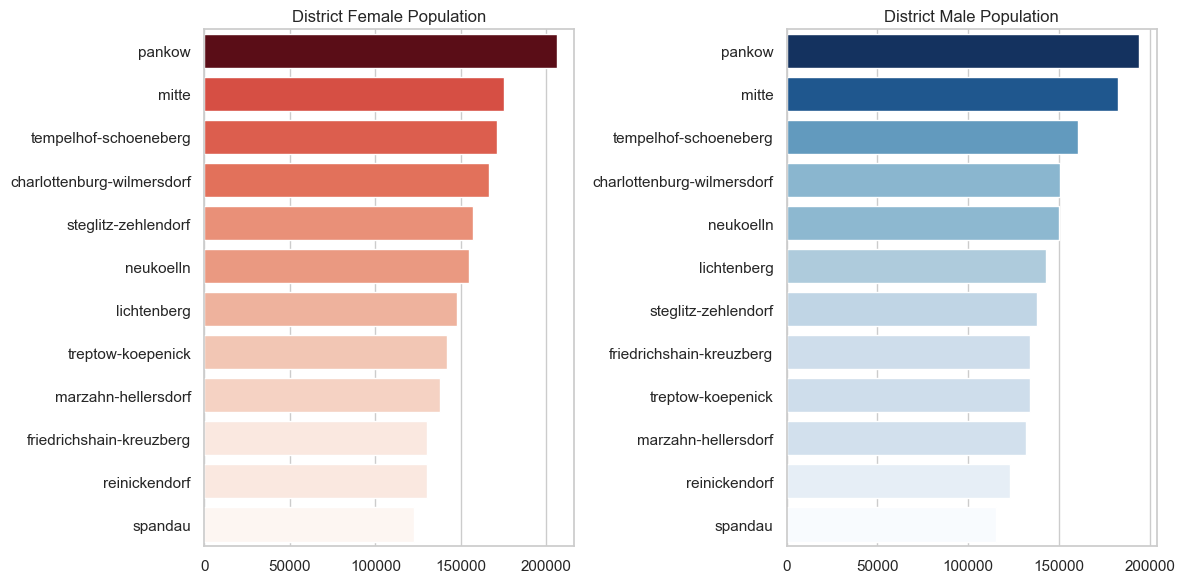

In [20]:
plt.figure(figsize=(12, 6))

# Female population
plt.subplot(1,2,1)
sns.barplot(
    data=bezirk_master.sort_values("district_female_population", ascending=False),
    x="district_female_population", 
    y="bezirk", 
    hue="district_female_population",
    palette="Reds",
    legend=False
)
plt.title("District Female Population")
plt.xlabel("")
plt.ylabel("")

# Male population
plt.subplot(1,2,2)
sns.barplot(
    data=bezirk_master.sort_values("district_male_population", ascending=False),
    x="district_male_population", 
    y="bezirk", 
    hue="district_male_population",
    palette="Blues",
    legend=False
)
plt.title("District Male Population")
plt.xlabel("")
plt.ylabel("")

plt.tight_layout()
plt.show()

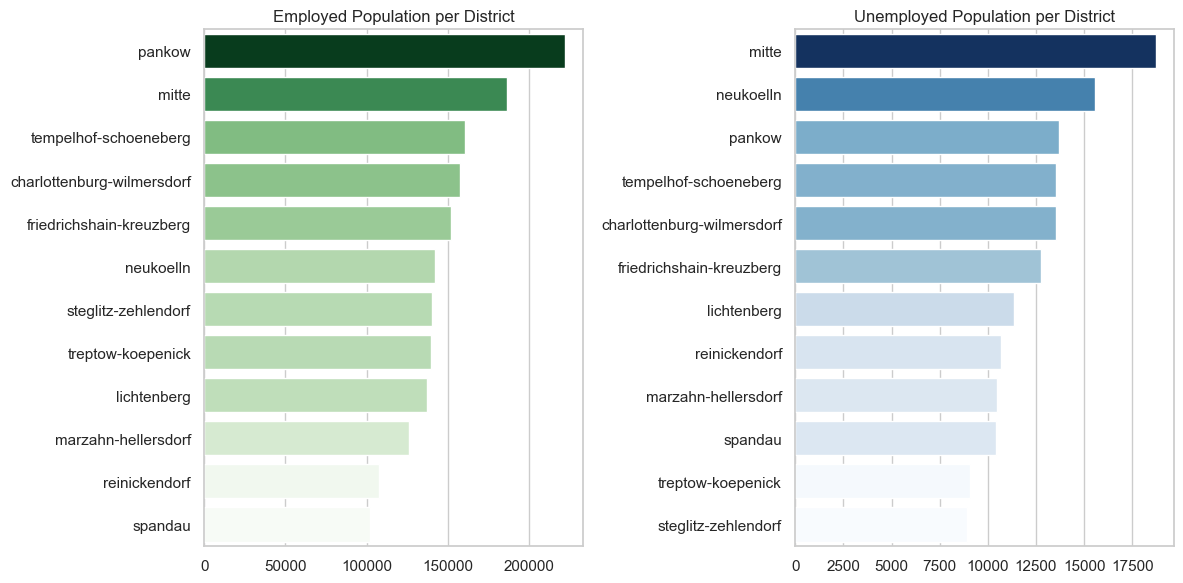

In [75]:
plt.figure(figsize=(12, 6))

# Female population
plt.subplot(1,2,1)
sns.barplot(
    data=bezirk_master.sort_values("district_employed", ascending=False),
    x="district_employed", 
    y="bezirk", 
    hue="district_employed",
    palette="Greens",
    legend=False
)
plt.title("Employed Population per District")
plt.xlabel("")
plt.ylabel("")

# Male population
plt.subplot(1,2,2)
sns.barplot(
    data=bezirk_master.sort_values("district_unemployed", ascending=False),
    x="district_unemployed", 
    y="bezirk", 
    hue="district_unemployed",
    palette="Blues",
    legend=False
)
plt.title("Unemployed Population per District")
plt.xlabel("")
plt.ylabel("")

plt.tight_layout()
plt.show()

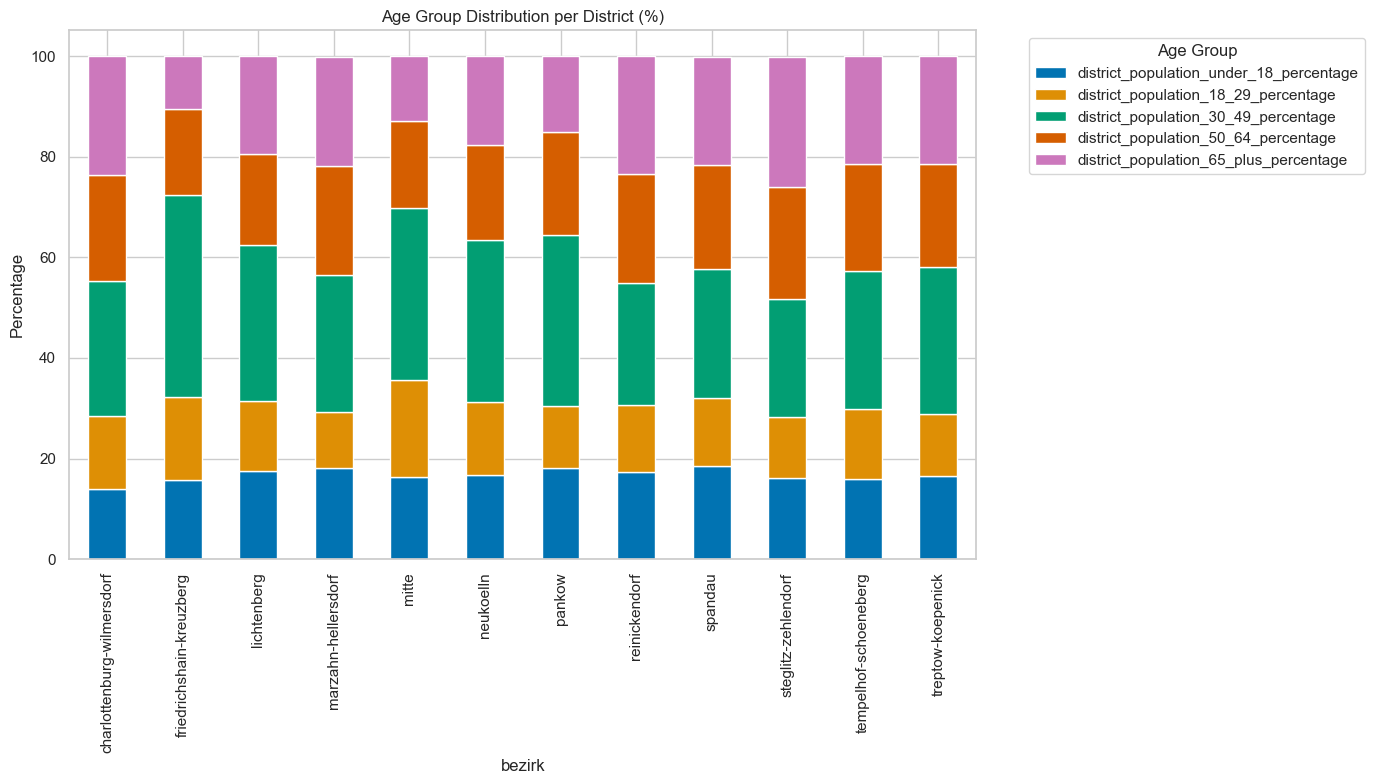

In [23]:
# Age distribution by category
age_cols = [
    "district_population_under_18_percentage",
    "district_population_18_29_percentage",
    "district_population_30_49_percentage",
    "district_population_50_64_percentage",
    "district_population_65_plus_percentage"
]

age_df = bezirk_master[["bezirk"] + age_cols].set_index("bezirk")

age_df.plot(kind="bar", stacked=True, figsize=(14,8))
plt.title("Age Group Distribution per District (%)")
plt.ylabel("Percentage")
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

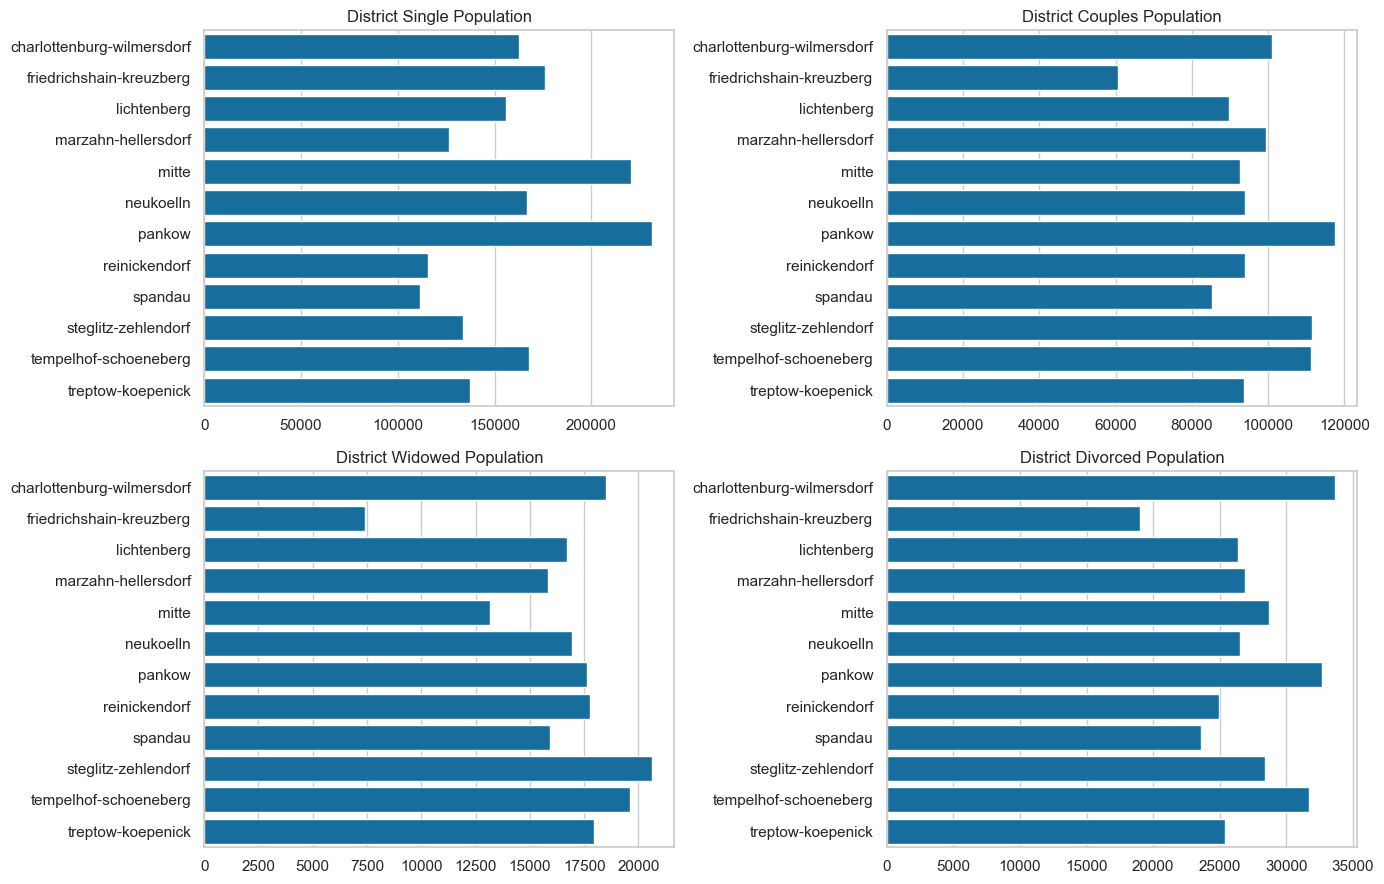

In [29]:
# Create visualization for district demographics
plt.figure(figsize=(14, 9))

plt.subplot(2,2,1)
sns.barplot(x=bezirk_master["district_single_population"], y=bezirk_master["bezirk"])
plt.title("District Single Population")
plt.xlabel("")
plt.ylabel("")

plt.subplot(2,2,2)
sns.barplot(x=bezirk_master["district_couples_population"], y=bezirk_master["bezirk"])
plt.title("District Couples Population")
plt.xlabel("")
plt.ylabel("")

plt.subplot(2,2,3)
sns.barplot(x=bezirk_master["district_widowed_population"], y=bezirk_master["bezirk"])
plt.title("District Widowed Population")
plt.xlabel("")
plt.ylabel("")

plt.subplot(2,2,4)
sns.barplot(x=bezirk_master["district_divorced_population"], y=bezirk_master["bezirk"])
plt.title("District Divorced Population")
plt.xlabel("")
plt.ylabel("")

plt.tight_layout()

# District Housing

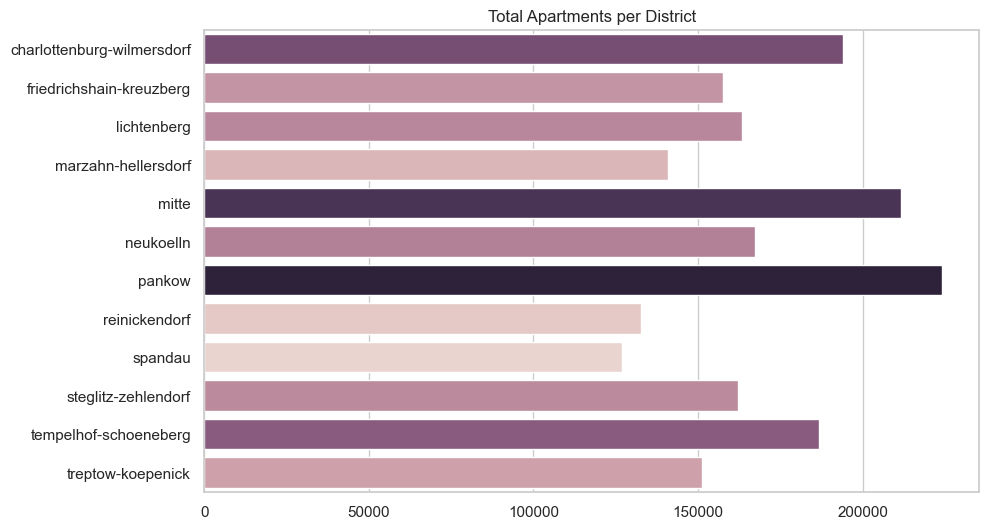

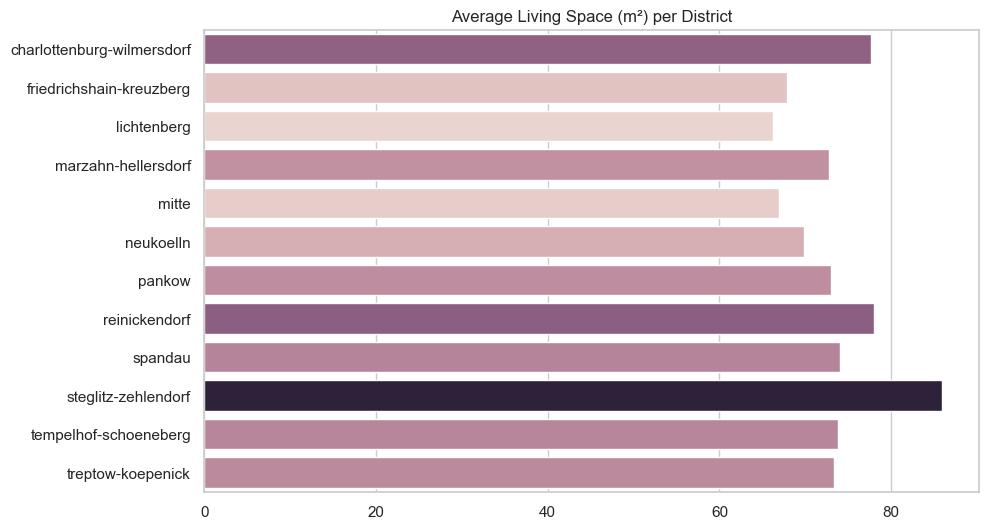

In [36]:
# Apartments per district
plt.figure(figsize=(10,6))
sns.barplot(x="district_total_apartments", y="bezirk", data=bezirk_master, hue="district_total_apartments", legend=False)
plt.title("Total Apartments per District")
plt.xlabel("")
plt.ylabel("")
plt.show()

# Living space
plt.figure(figsize=(10,6))
sns.barplot(x="district_average_living_space_m2", y="bezirk", data=bezirk_master, hue="district_average_living_space_m2", legend=False)
plt.title("Average Living Space (m²) per District")
plt.xlabel("")
plt.ylabel("")
plt.show()

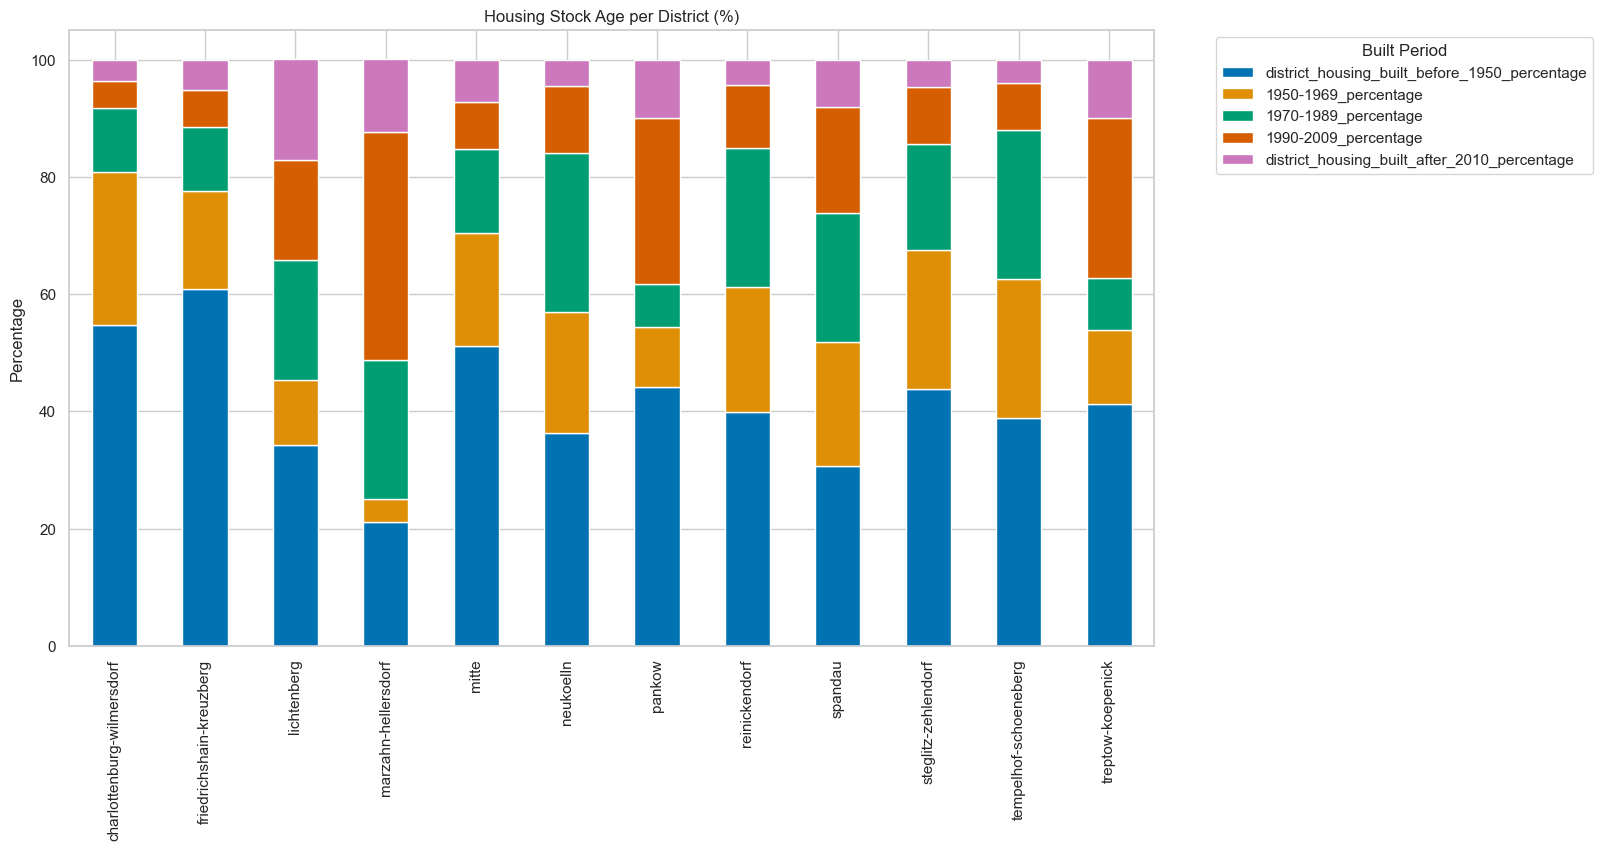

In [43]:
# Housing built period distribution
built_cols = ["district_housing_built_before_1950_percentage",
              "1950-1969_percentage","1970-1989_percentage",
              "1990-2009_percentage","district_housing_built_after_2010_percentage"]

built_df = bezirk_master[["bezirk"] + built_cols].set_index("bezirk")
built_df.plot(kind="bar", stacked=True, figsize=(14,8))
plt.title("Housing Stock Age per District (%)")
plt.ylabel("Percentage")
plt.xlabel("")
plt.legend(title="Built Period", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# District Enrichment Features

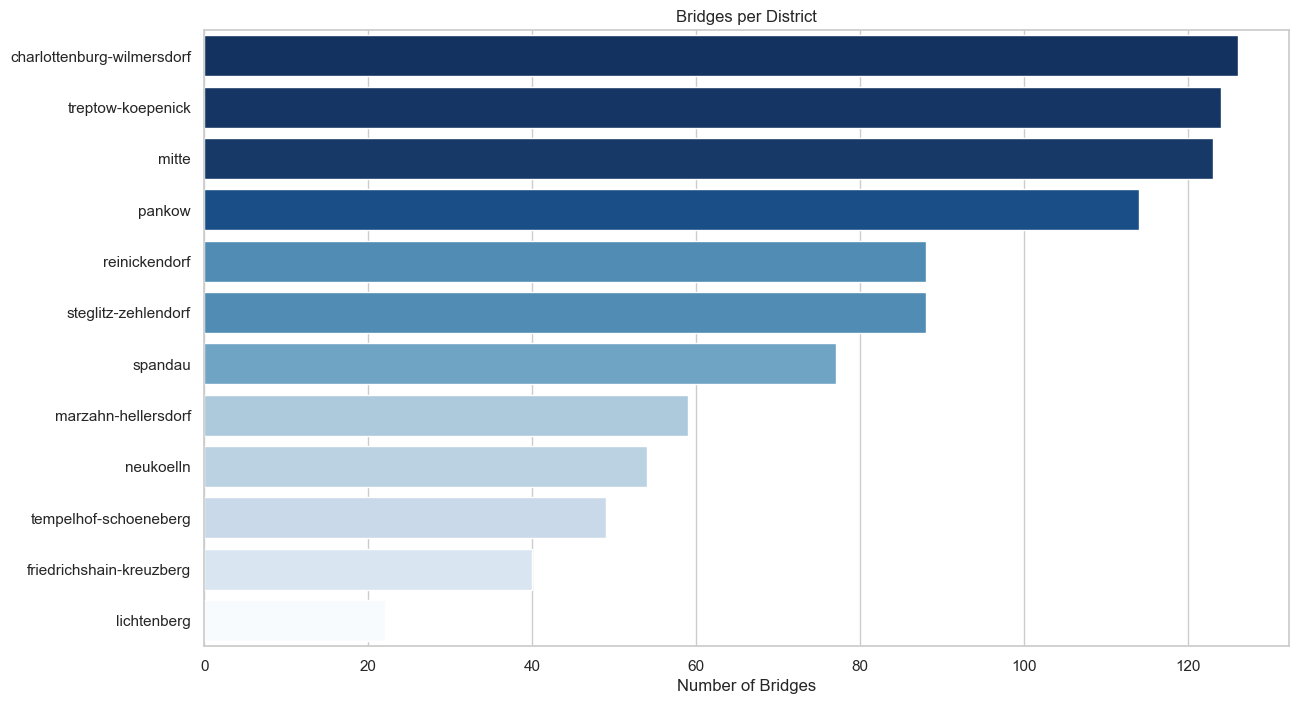

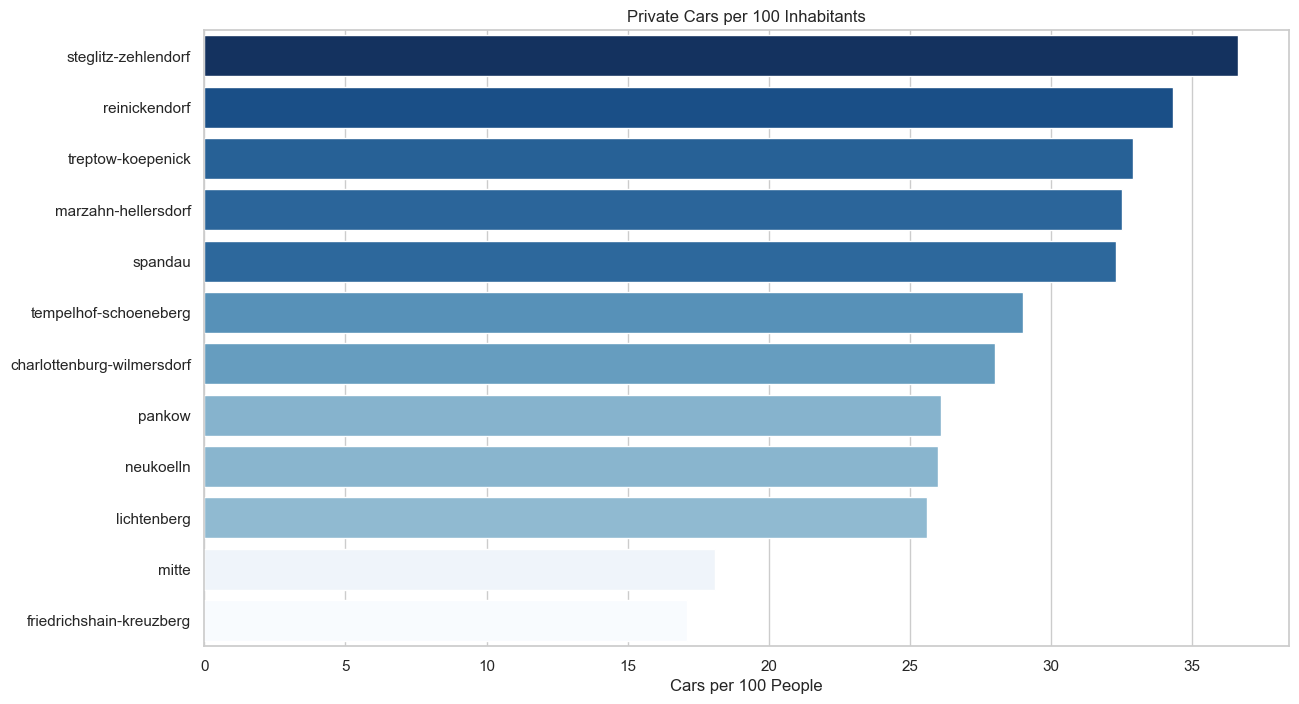

In [53]:
plt.figure(figsize=(14,8))
sns.barplot(data=bezirk_master.sort_values("district_total_bridges", ascending=False),
            x="district_total_bridges", y="bezirk", hue="district_total_bridges", palette="Blues", legend=False)
plt.title("Bridges per District")
plt.xlabel("Number of Bridges"); plt.ylabel("")
plt.show()

plt.figure(figsize=(14,8))
sns.barplot(data=bezirk_master.sort_values("district_private_cars_per_100_inhabitants", ascending=False),
            x="district_private_cars_per_100_inhabitants", y="bezirk", hue="district_private_cars_per_100_inhabitants", palette="Blues", legend=False)
plt.title("Private Cars per 100 Inhabitants")
plt.xlabel("Cars per 100 People"); plt.ylabel("")
plt.show()

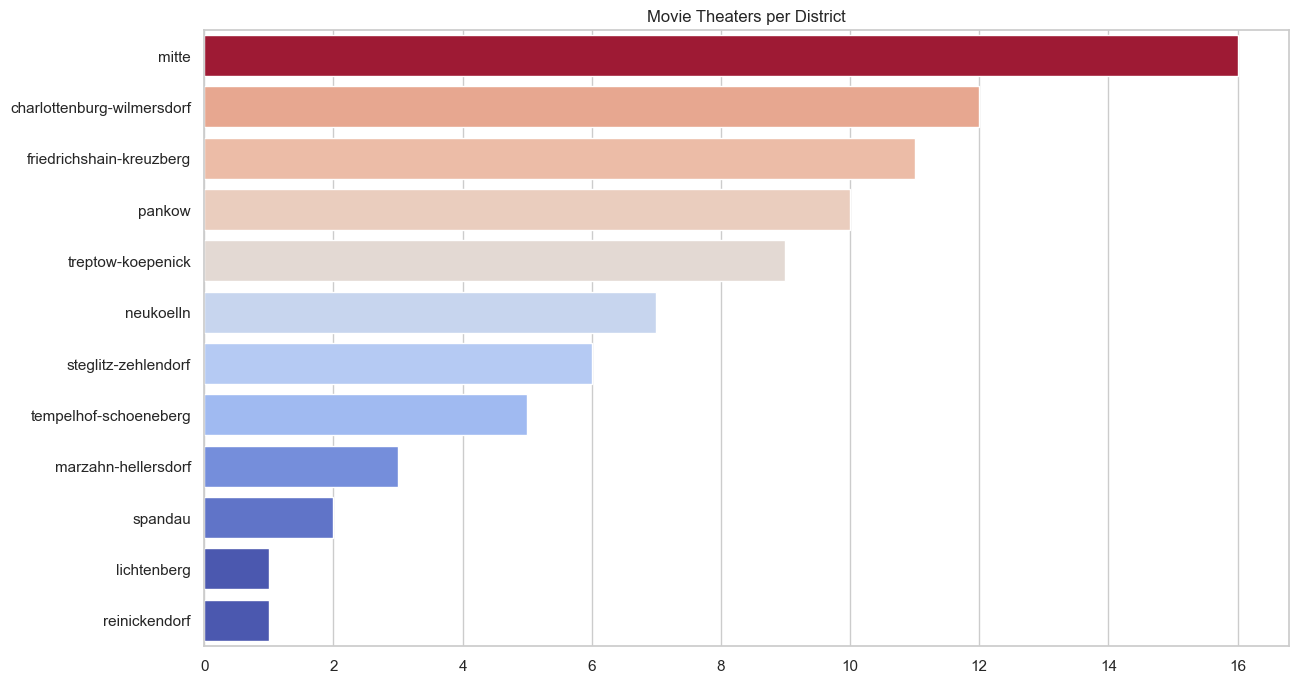

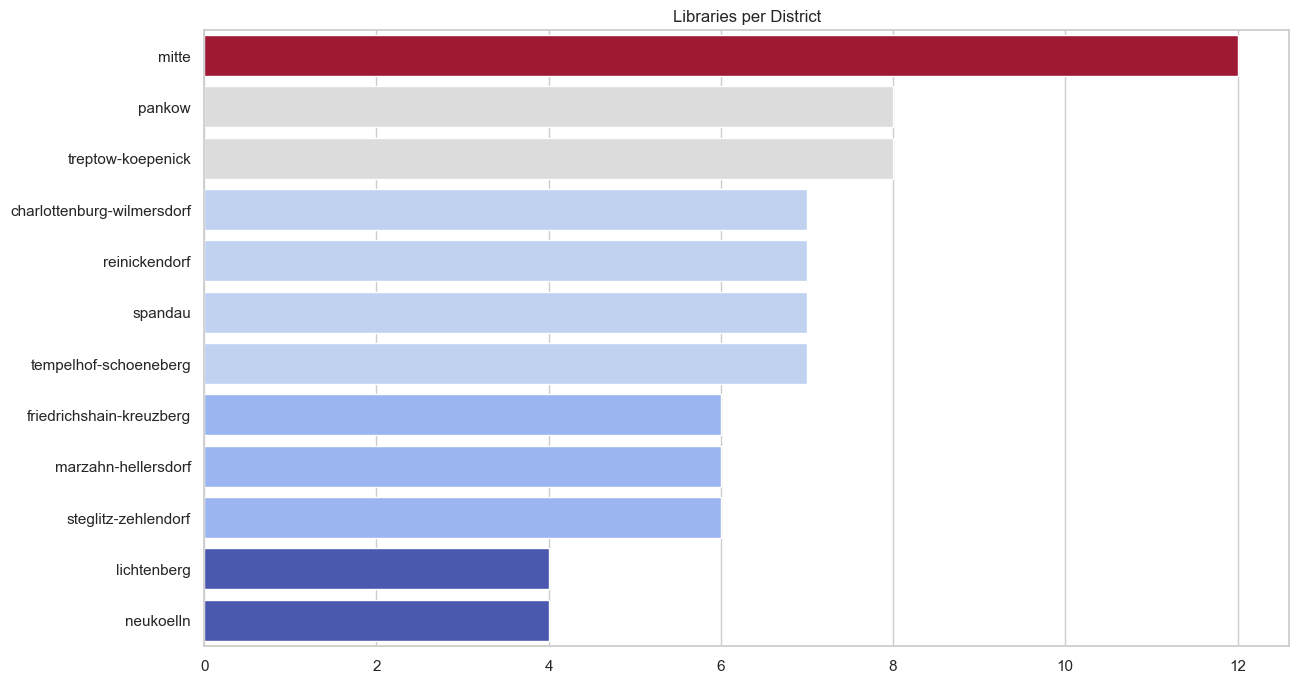

In [62]:
plt.figure(figsize=(14,8))
sns.barplot(data=bezirk_master.sort_values("district_movie_theaters", ascending=False),
            x="district_movie_theaters", y="bezirk", hue="district_movie_theaters", palette="coolwarm", legend=False)
plt.title("Movie Theaters per District")
plt.xlabel(""); plt.ylabel("")
plt.show()

plt.figure(figsize=(14,8))
sns.barplot(data=bezirk_master.sort_values("district_libraries", ascending=False),
            x="district_libraries", y="bezirk", hue="district_libraries", palette="coolwarm", legend=False)
plt.title("Libraries per District")
plt.xlabel(""); plt.ylabel("")
plt.show()

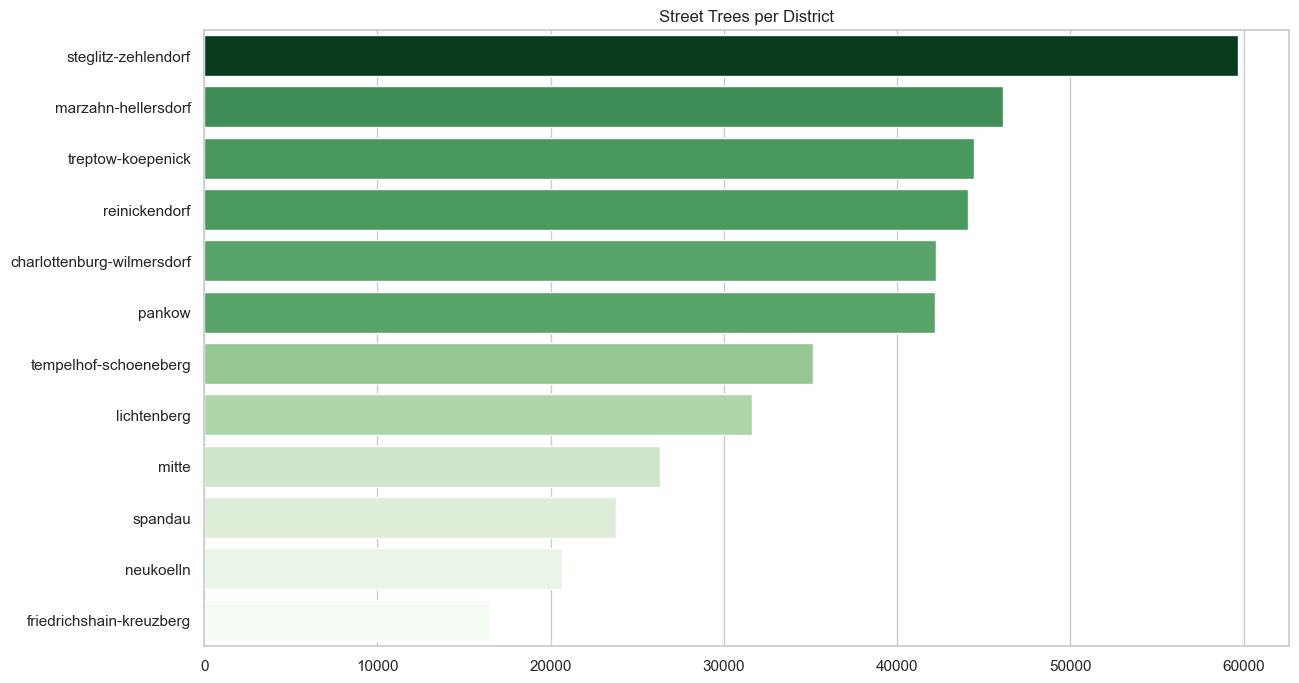

In [61]:
plt.figure(figsize=(14,8))
sns.barplot(data=bezirk_master.sort_values("district_street_trees", ascending=False),
            x="district_street_trees", y="bezirk", hue="district_street_trees", palette="Greens", legend=False)
plt.title("Street Trees per District")
plt.xlabel(""); plt.ylabel("")
plt.show()

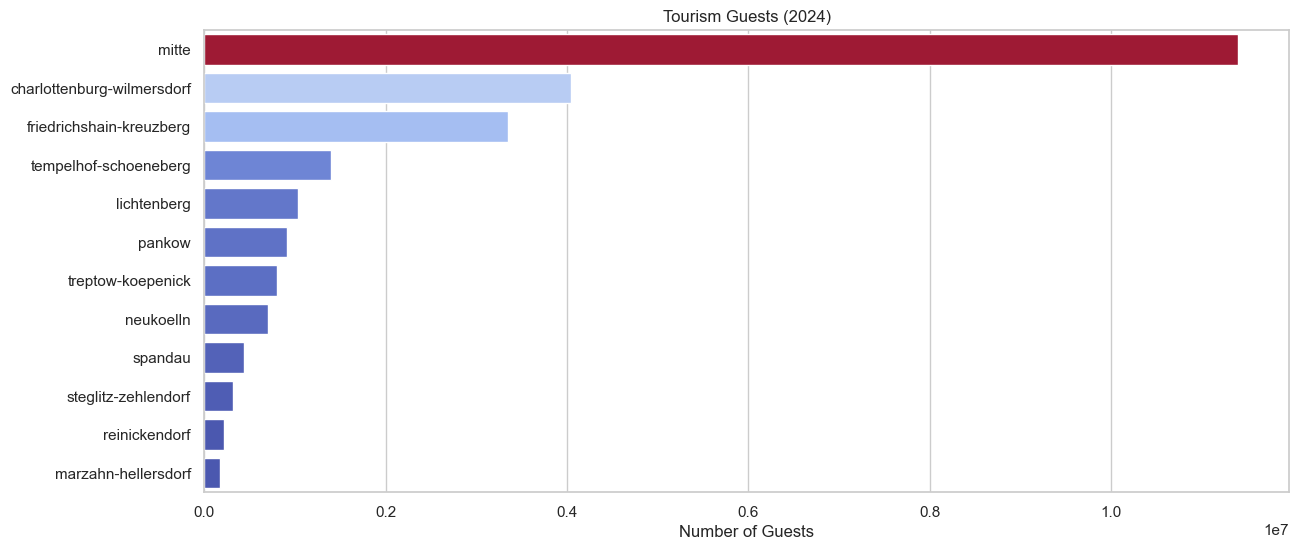

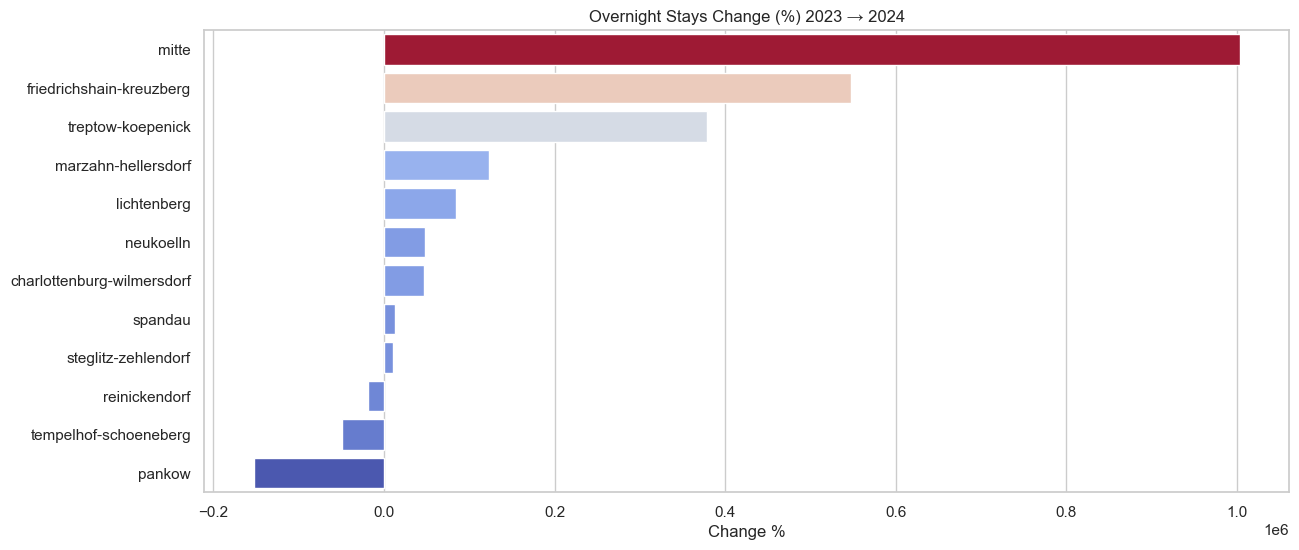

In [66]:
plt.figure(figsize=(14,6))
sns.barplot(data=bezirk_master.sort_values("district_tourism_guests_2024", ascending=False),
            x="district_tourism_guests_2024", y="bezirk", hue="district_tourism_guests_2024", palette="coolwarm", legend=False)
plt.title("Tourism Guests (2024)")
plt.xlabel("Number of Guests"); plt.ylabel("")
plt.show()

plt.figure(figsize=(14,6))
sns.barplot(data=bezirk_master.sort_values("district_tourism_overnightstays_change_2023_2024", ascending=False),
            x="district_tourism_overnightstays_change_2023_2024", y="bezirk", hue="district_tourism_overnightstays_change_2023_2024", palette="coolwarm", legend=False)
plt.title("Overnight Stays Change (%) 2023 → 2024")
plt.xlabel("Change %"); plt.ylabel("")
plt.show()

# Correlations

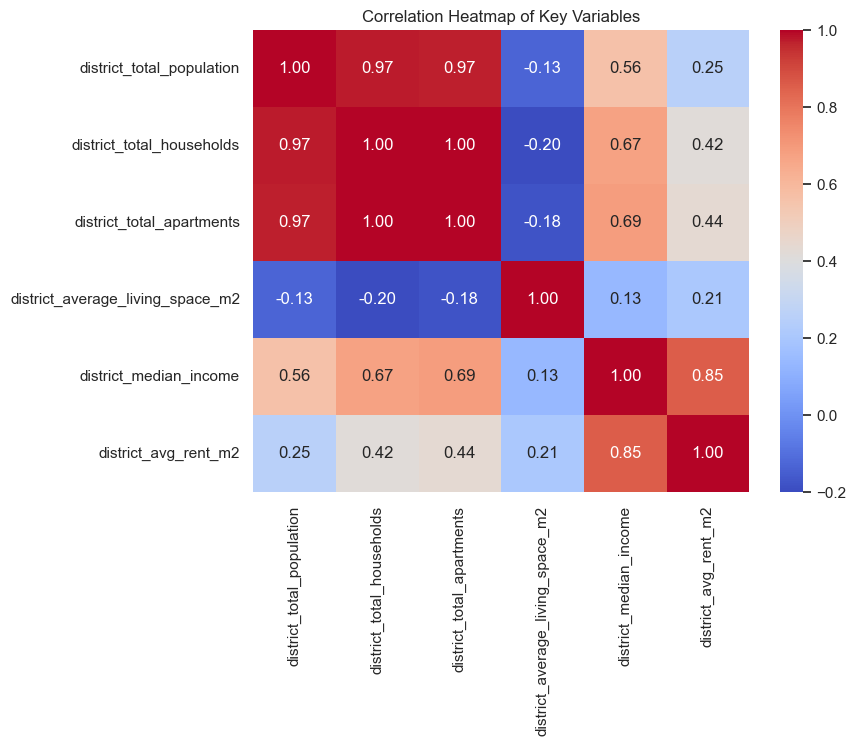

In [69]:
# Correlation heatmap
key_cols = [
    "district_total_population","district_total_households","district_total_apartments",
    "district_average_living_space_m2","district_median_income","district_avg_rent_m2"
]

plt.figure(figsize=(8,6))
sns.heatmap(bezirk_master[key_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Key Variables")
plt.show()

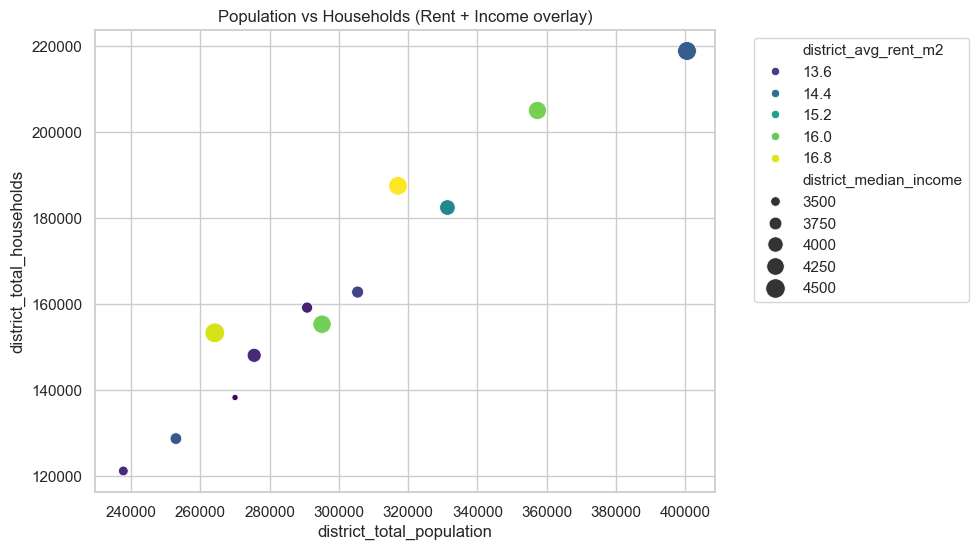

In [73]:
# Population vs households
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=bezirk_master,
    x="district_total_population", 
    y="district_total_households",
    hue="district_avg_rent_m2", size="district_median_income", sizes=(20,200), palette="viridis"
)
plt.title("Population vs Households (Rent + Income overlay)")
plt.legend(title="", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()